## Compare Peggy WxPAK (Coastal Enviornmental) to ENGR ATRH to Tflex system


February/March 2019

- comparison done in Puget Sound

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [53]:
## wxpak ingest
wxpakfile1='M2 MetPackage Test/M2_peggy/028882_2019.csv'
wxpakfile2='M2 MetPackage Test/M2_peggy/028883_2019.csv'

wxpakfile_download='M2 MetPackage Test/wpak_downloaded/2_15_19_weatherpak_test_download.txt'

In [54]:
wxpak1 = pd.read_csv(wxpakfile1,parse_dates=['sampletime'],index_col='sampletime')
wxpak2 = pd.read_csv(wxpakfile2,parse_dates=['sampletime'],index_col='sampletime')

def dateparse(d,t):
    dt = d + " " + t
    return pd.datetime.strptime(dt, '%y/%m/%d %H:%M:%S')

wxpak_dl = pd.read_csv(wxpakfile_download,delimiter='\s+',parse_dates=[['DATE', 'TIME']],date_parser=dateparse,index_col='DATE_TIME')

wx1 = wxpak1.resample('1H').median()
wx2 = wxpak2.resample('1H').median()
wxdl = wxpak_dl.resample('1H').median()

wx2[wx2.BP < 960] = np.nan

In [55]:
## ATRH - ENGR Ingest

ATRH_Baro = 'M2 MetPackage Test/CM002_02_26-03_08_2019-BARO.txt'
ATRH_Wind = 'M2 MetPackage Test/CM002_02_26-03_08_2019-WIND.txt'
ATRH = 'M2 MetPackage Test/CM002_02_26-03_08_2019-ATRH.txt'

In [56]:
atrh1 = pd.read_csv(ATRH_Baro,parse_dates=['DT'],index_col='DT')
atrh2 = pd.read_csv(ATRH_Wind,parse_dates=['DT'],index_col='DT')
atrh3 = pd.read_csv(ATRH,parse_dates=['DT'],index_col='DT')


## Quicklooks of Met Packages

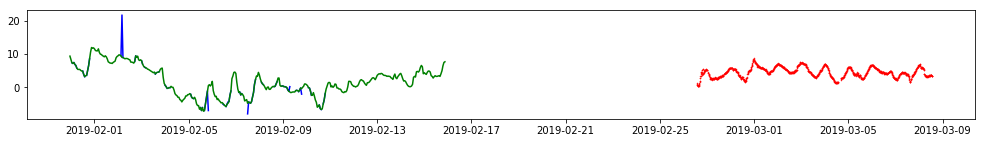

In [57]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh3.RH,'r.',markersize=1)
plt.plot(wx1['AT'],'b-')
plt.plot(wx2['AT'],'b-')
plt.plot(wxdl['TA'],'g-')


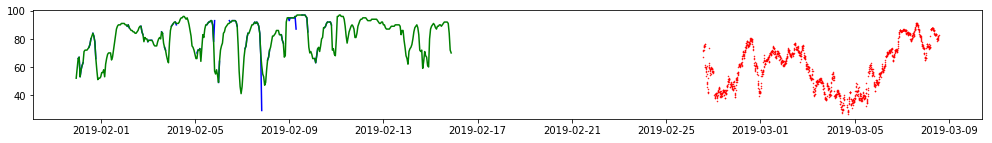

In [58]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh3.AT,'r.',markersize=1)
plt.plot(wx1['RH'],'b-')
plt.plot(wx2['RH'],'b-')
plt.plot(wxdl['RH'],'g-')


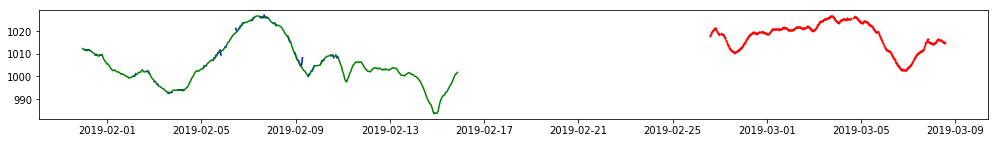

In [59]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh1.BP,'r.',markersize=1)
plt.plot(wx1['BP'],'b-')
plt.plot(wx2['BP'],'b-')
plt.plot(wxdl['BP'],'g-')


(737115.0, 737129.0)

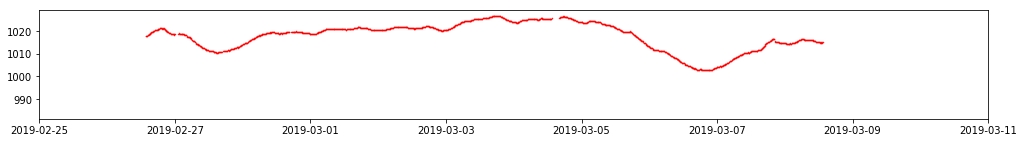

In [60]:
##plot
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(atrh1.BP,'r.',markersize=1)
plt.plot(wx1['BP'],'b-')
plt.plot(wx2['BP'],'b-')
plt.plot(wxdl['BP'],'g-')

plt.xlim(['2019-02-25','2019-03-11'])

(737115.0, 737129.0)

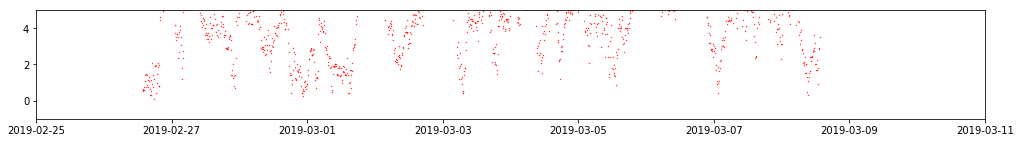

In [68]:
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(np.sqrt(atrh2.U**2 + atrh2.V**2),'r.',markersize=.75)
plt.plot(wx1['WS'],'b+')
plt.plot(wx2['WS'],'b+')
plt.plot(wxdl['WS'],'g+')

plt.ylim([-1,5])
plt.xlim(['2019-02-25','2019-03-11'])

(737115.0, 737129.0)

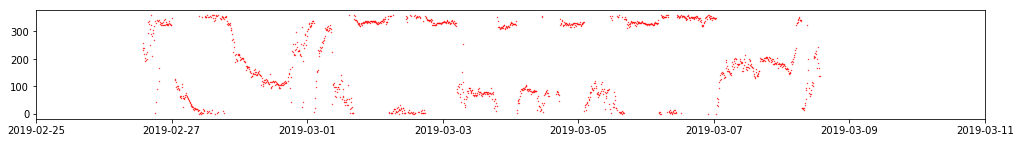

In [67]:
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(180+np.rad2deg(np.arctan2(atrh2.U, atrh2.V)),'r.',markersize=.75)
plt.plot(wx1['WD'],'b+')
plt.plot(wx2['WD'],'b+')
plt.plot(wxdl['WD'],'g+')

plt.xlim(['2019-02-25','2019-03-11'])

### Subsample ATRH to hourly (grab closest to top of hour) for difference plots 
- alternatively, upsample (with np.nan's) the Peggy data and compare

In [64]:
wx1u = wxpak1.resample('10T').median()
wx2u = wxpak2.resample('10T').median()

In [65]:
#atrh2.to_csv('atrh2.csv')
wx2u.to_csv('wxpak2.csv')

### Other Sensors
solar rad

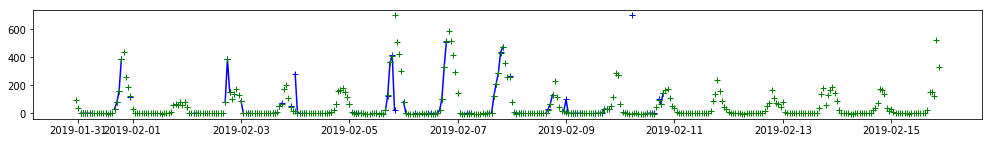

In [66]:
fig, ax = plt.subplots(figsize=(17, 2))
plt.plot(wx1['SR'],'b-+')
plt.plot(wx2['SR'],'b-+')
plt.plot(wxdl['SR'],'g+')
